In [ ]:
# Titanic Survived Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


The dataset contains the information of people where both numerical and categorical data present. Here 'Survived' is the target variable which contains 2 categories, so it will be temed as 'Classification Problem' where we need to predict if an arbitrary passanger on Titanic would survive the sinking or not.

In [3]:
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.tail(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [5]:
df.shape

(891, 12)

The dataset contains 891 rows and 12 columns. Out of which 1 is taraget variable and the remaining 11 are independent variables

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [10]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

There are three different types of data (object, int64, float64) present in the dataset

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64


0    549
1    342
Name: Survived, dtype: int64


3    491
1    216
2    184
Name: Pclass, dtype: int64


Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64


male      577
female    314
Name: Sex, dtype: int64


24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length

In [23]:
df.loc[df["Age"]!='NaN']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [19]:
np.mean(df["Age"])

29.69911764705882

In [24]:
df["Age"]=df["Age"].fillna(df["Age"].mean())

In [25]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [48]:
# Droping Passenger Id, Cabin, Emabraked Columns
df.drop("PassengerId", axis=1, inplace=True)
df.drop("Cabin", axis=1, inplace=True)
df.drop("Embarked", axis=1, inplace=True)

In [57]:
# Converting float datatype to object datatype
df["Survived"]=df["Survived"].astype(object)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    object 
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 62.8+ KB


In [59]:
df["Survived"]=df["Survived"].replace(0,"No")
df["Survived"]=df["Survived"].replace(1,"Yes")

In [60]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,No,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500
1,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833
2,Yes,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250
3,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000
4,No,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...
886,No,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000
887,Yes,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000
888,No,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500
889,Yes,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000


In [61]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    object 
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 62.8+ KB


<Axes: >

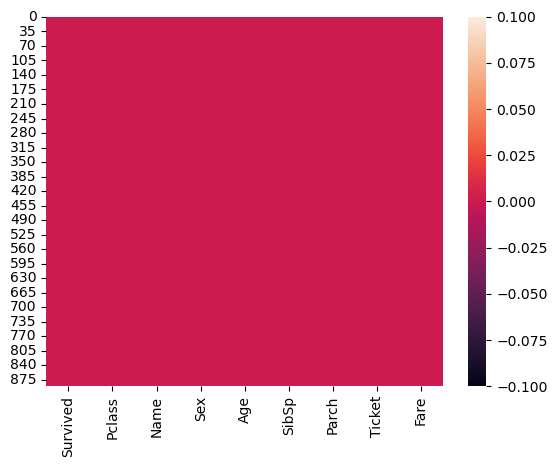

In [63]:
sns.heatmap(df.isnull())

In [64]:
# Seperating numerical and categorical columns
# Checking for categorical column
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        cat_col.append(i)
print("Categorical Columns are:",cat_col)
print("\n")

# Checking for numerical column
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        num_col.append(i)
print("Numerical Columns are:",num_col)
print("\n")

Categorical Columns are: ['Survived', 'Name', 'Sex', 'Ticket']


Numerical Columns are: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']




In [65]:
# Checking nmber of unique values in each column
df.nunique().to_frame("No. of Unique values")

,No. of Unique values
Survived,2
Pclass,3
Name,891
Sex,2
Age,89
SibSp,7
Parch,7
Ticket,681
Fare,248


In [66]:
# Statistical summary of numerical columns
df.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,29.699118,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


1. The counts of all the columns are same which means there are no missing values in the dataset
2. The mean value is greater than the median(50%) in SibSp, Parch, Fare, which means the data is skewed to right in these columns
3. The mean value is lesser than the median(50%) in Pclass, which means the data is skewed to left in this column
4. By summerizing the data we can observe that there are difference between 75% and max in Age, SibSp, Parch, Fare columns, hence there are outliers present in the data

No     549
Yes    342
Name: Survived, dtype: int64


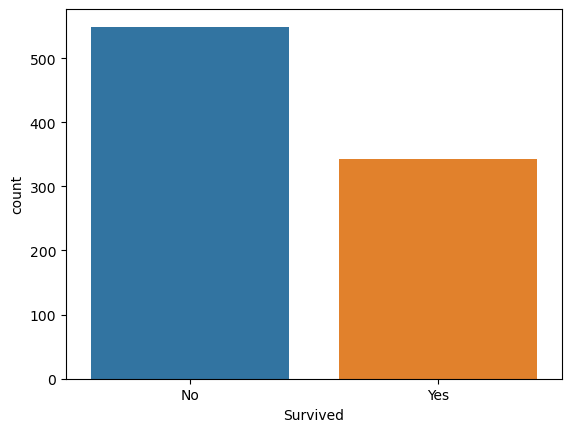

In [67]:
# Visualize the number of survived passengers
ax=sns.countplot(x='Survived',data=df)
print(df['Survived'].value_counts())

3    491
1    216
2    184
Name: Pclass, dtype: int64


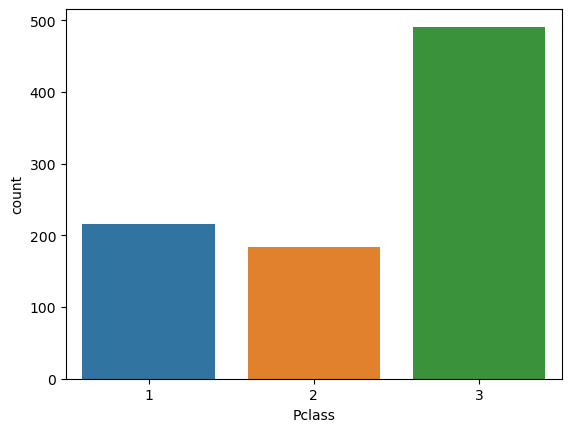

In [68]:
# Visualize the number of Passenger Class
ax=sns.countplot(x='Pclass',data=df)
print(df['Pclass'].value_counts())

male      577
female    314
Name: Sex, dtype: int64


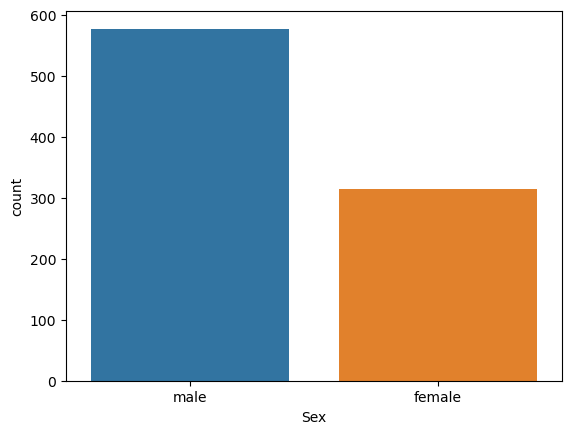

In [69]:
# Visualize the sex of the passengers
ax=sns.countplot(x='Sex',data=df)
print(df['Sex'].value_counts())

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


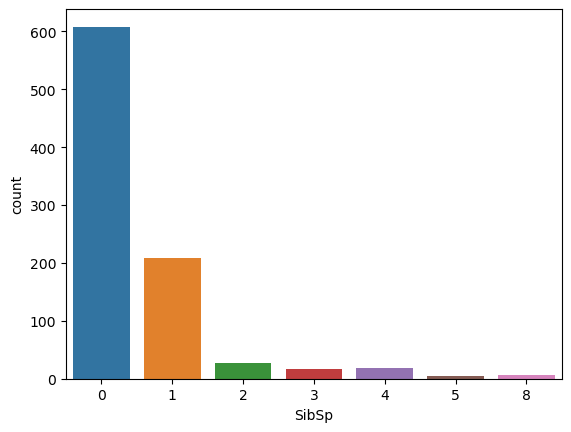

In [70]:
# Visualize the number of Siblings/Spouses Aboard
ax=sns.countplot(x='SibSp',data=df)
print(df['SibSp'].value_counts())

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


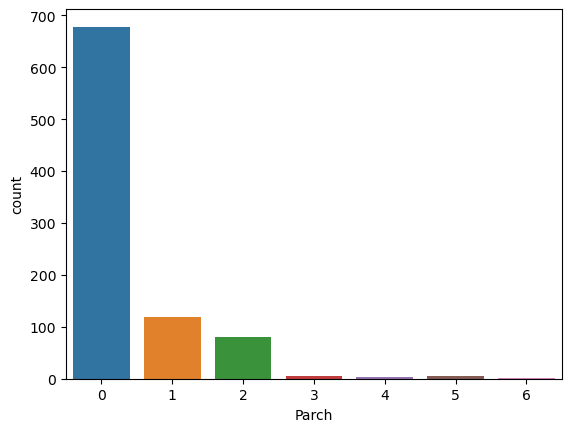

In [71]:
# Visualize the number of Parents/Children Aboard
ax=sns.countplot(x='Parch',data=df)
print(df['Parch'].value_counts())

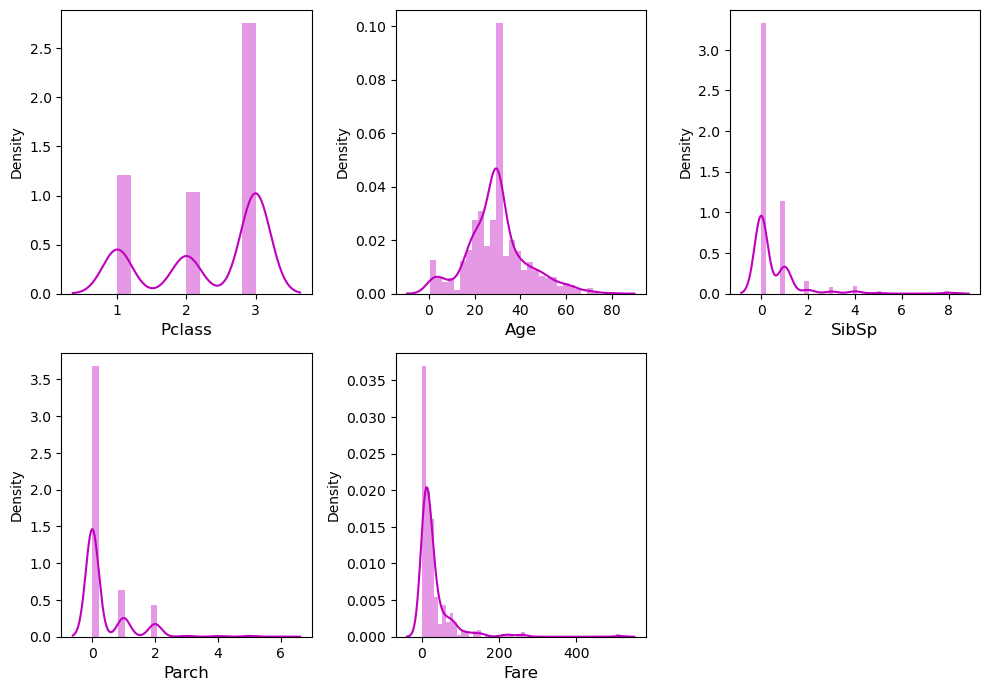

In [73]:
plt.figure(figsize=(10,10),facecolor="white")
plotnumber=1
for col in num_col:
    if plotnumber<=5:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[col],color="m")
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

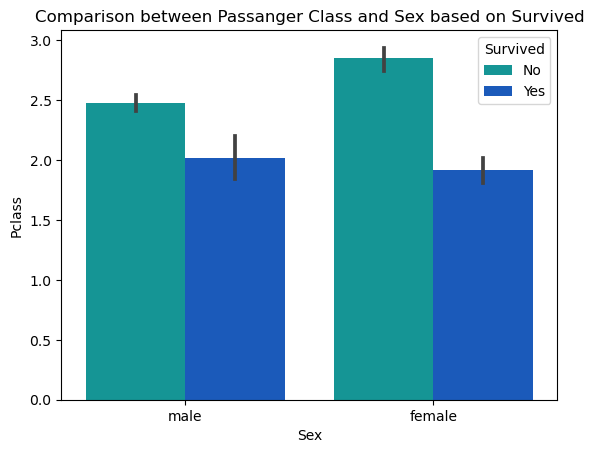

In [93]:
# Comparing Pclass and Sex on the basis of Survived
plt.title("Comparison between Passanger Class and Sex based on Survived")
sns.barplot(x="Sex",y="Pclass",data=df,palette="winter_r",hue="Survived")
plt.show()

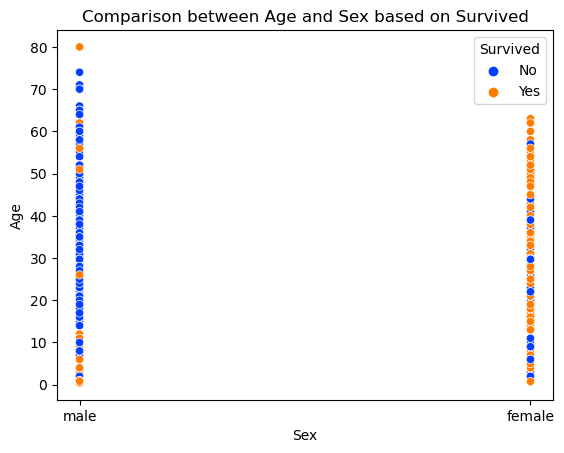

In [95]:
# Comparing Age and Sex on the basis of Survived
plt.title("Comparison between Age and Sex based on Survived")
sns.scatterplot(x="Sex",y="Age",data=df,palette="bright",hue="Survived")
plt.show()

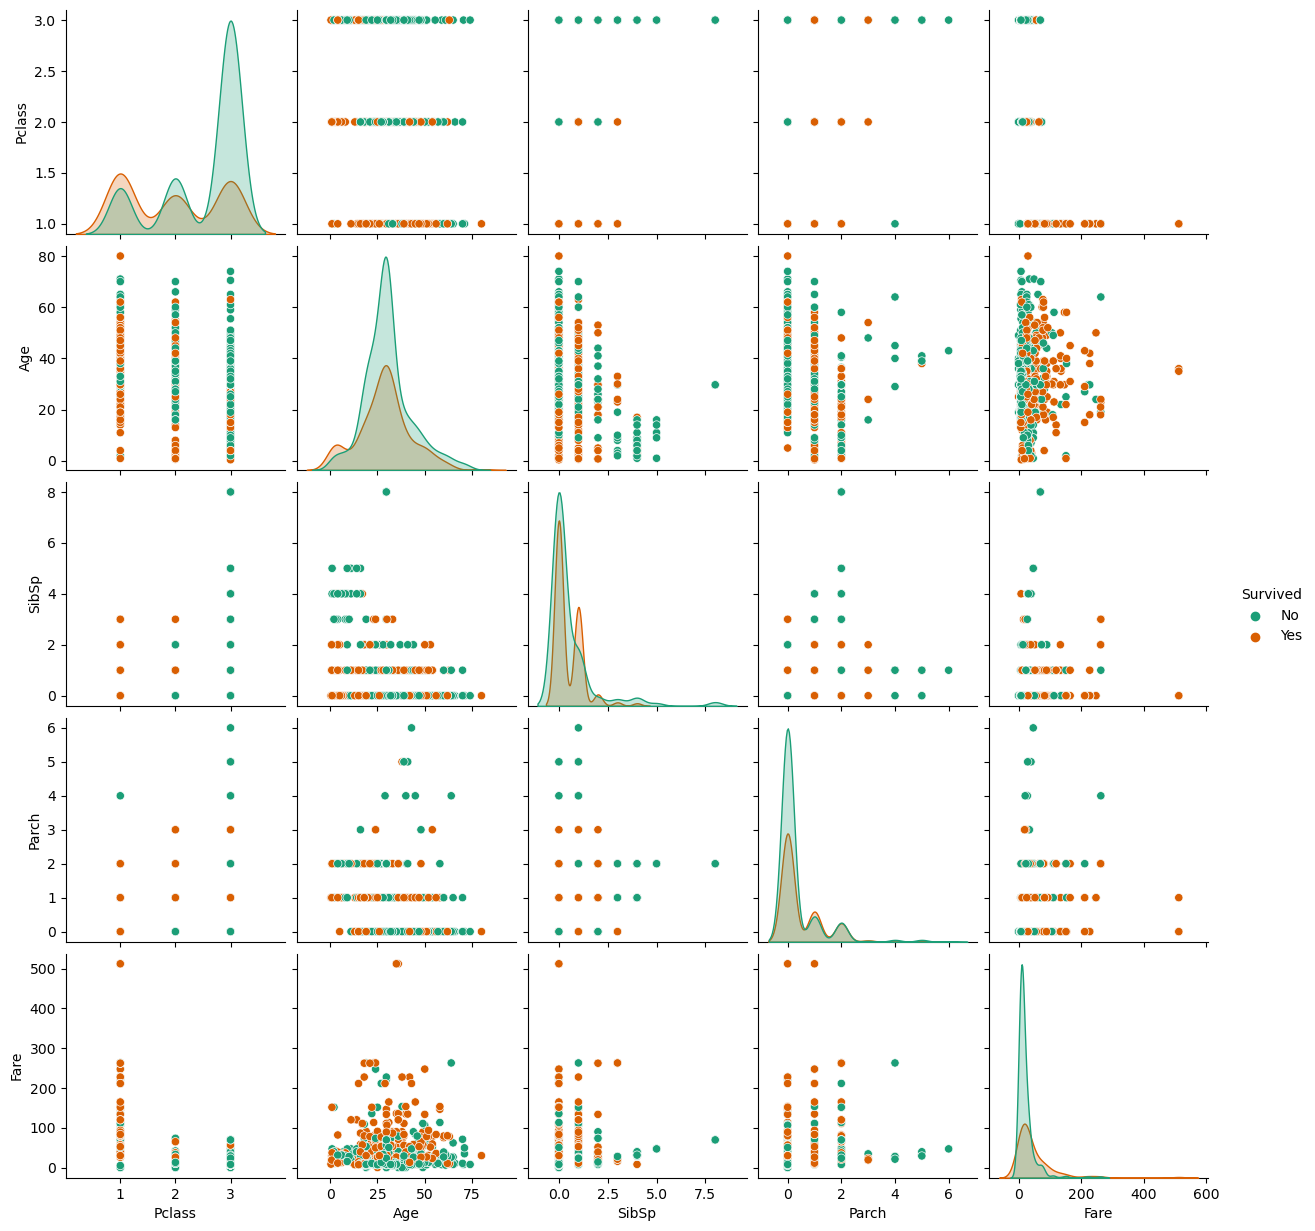

In [96]:
sns.pairplot(df,hue="Survived",palette="Dark2")
plt.show()

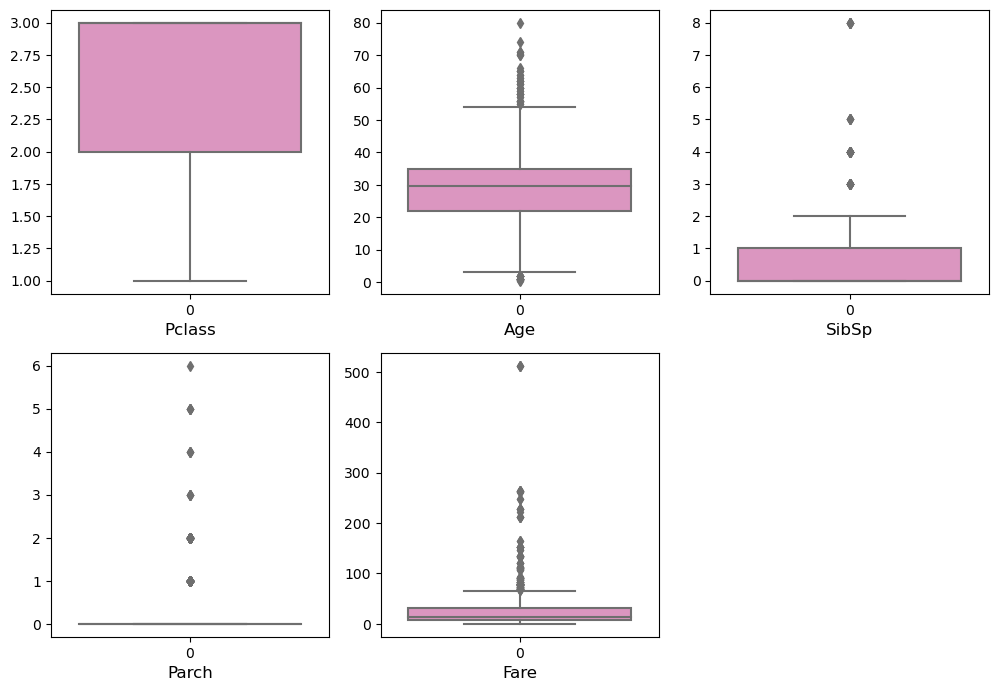

In [99]:
# Checking for outliers by plotting boxplpot
plt.figure(figsize=(10,10),facecolor="white")
plotnumber=1
for col in num_col:
    if plotnumber<=5:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col],palette="Set2_r")
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [100]:
df.skew()

Pclass   -0.630548
Age       0.434488
SibSp     3.695352
Parch     2.749117
Fare      4.787317
dtype: float64

The columns SibSp, Parch, Fare have skewness in the data and we apply cuberoot method to remove skewness

In [101]:
df["SibSp"]=np.cbrt(df["SibSp"])
df["Parch"]=np.cbrt(df["Parch"])
df["Fare"]=np.cbrt(df["Fare"])

In [102]:
df.skew()

Pclass   -0.630548
Age       0.434488
SibSp     1.033059
Parch     1.348334
Fare      1.230382
dtype: float64

The columns SibSp, Parch, Fare still have skewness in the data, so we apply cuberoot method one more time to remove skewness

In [103]:
df["SibSp"]=np.cbrt(df["SibSp"])
df["Parch"]=np.cbrt(df["Parch"])
df["Fare"]=np.cbrt(df["Fare"])

In [104]:
df.skew()

Pclass   -0.630548
Age       0.434488
SibSp     0.805580
Parch     1.237529
Fare     -2.950107
dtype: float64

The column Parch have skewness in the data, so we apply cuberoot method one more time to remove skewness

In [105]:
df["Parch"]=np.cbrt(df["Parch"])

In [106]:
df.skew()

Pclass   -0.630548
Age       0.434488
SibSp     0.805580
Parch     1.226942
Fare     -2.950107
dtype: float64

In [110]:
# Encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,0.0,3,108.0,1.0,22.000000,1.0,0.000000,523.0,1.246215
1,1.0,1,190.0,0.0,38.000000,1.0,0.000000,596.0,1.606525
2,1.0,3,353.0,0.0,26.000000,0.0,0.000000,669.0,1.258603
3,1.0,1,272.0,0.0,35.000000,1.0,0.000000,49.0,1.554809
4,0.0,3,15.0,1.0,35.000000,0.0,0.000000,472.0,1.260794
...,...,...,...,...,...,...,...,...,...
886,0.0,2,548.0,1.0,27.000000,0.0,0.000000,101.0,1.329755
887,1.0,1,303.0,0.0,19.000000,0.0,0.000000,14.0,1.459233
888,0.0,3,413.0,0.0,29.699118,1.0,1.026004,675.0,1.419836
889,1.0,1,81.0,1.0,26.000000,0.0,0.000000,8.0,1.459233


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    float64
 3   Sex       891 non-null    float64
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    float64
 6   Parch     891 non-null    float64
 7   Ticket    891 non-null    float64
 8   Fare      891 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 62.8 KB


In [112]:
# Statistical summary of numerical columns
df.describe()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,445.000000,0.647587,29.699118,0.328973,0.242283,338.528620,1.371140
std,0.486592,0.836071,257.353842,0.477990,13.002015,0.483917,0.432582,200.850657,0.234520
min,0.000000,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,222.500000,0.000000,22.000000,0.000000,0.000000,158.500000,1.258345
50%,0.000000,3.000000,445.000000,1.000000,29.699118,0.000000,0.000000,337.000000,1.345514
75%,1.000000,3.000000,667.500000,1.000000,35.000000,1.000000,0.000000,519.500000,1.464559
max,1.000000,3.000000,890.000000,1.000000,80.000000,1.259921,1.068613,680.000000,2.000143


In [113]:
# Checking the correlation between features and target
cor=df.corr()
cor

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
Survived,1.000000,-0.338481,-0.057343,-0.543351,-0.069809,0.102835,0.146075,-0.164549,0.271859
Pclass,-0.338481,1.000000,0.052831,0.131900,-0.331339,-0.060271,-0.026252,0.319869,-0.432387
Name,-0.057343,0.052831,1.000000,0.020314,0.057466,-0.087549,-0.045383,0.047348,-0.038792
Sex,-0.543351,0.131900,0.020314,1.000000,0.084153,-0.199871,-0.248786,0.059372,-0.230156
Age,-0.069809,-0.331339,0.057466,0.084153,1.000000,-0.165308,-0.260931,-0.068848,0.059439
SibSp,0.102835,-0.060271,-0.087549,-0.199871,-0.165308,1.000000,0.438028,0.004958,0.313266
Parch,0.146075,-0.026252,-0.045383,-0.248786,-0.260931,0.438028,1.000000,-0.005919,0.288123
Ticket,-0.164549,0.319869,0.047348,0.059372,-0.068848,0.004958,-0.005919,1.000000,-0.034034
Fare,0.271859,-0.432387,-0.038792,-0.230156,0.059439,0.313266,0.288123,-0.034034,1.000000


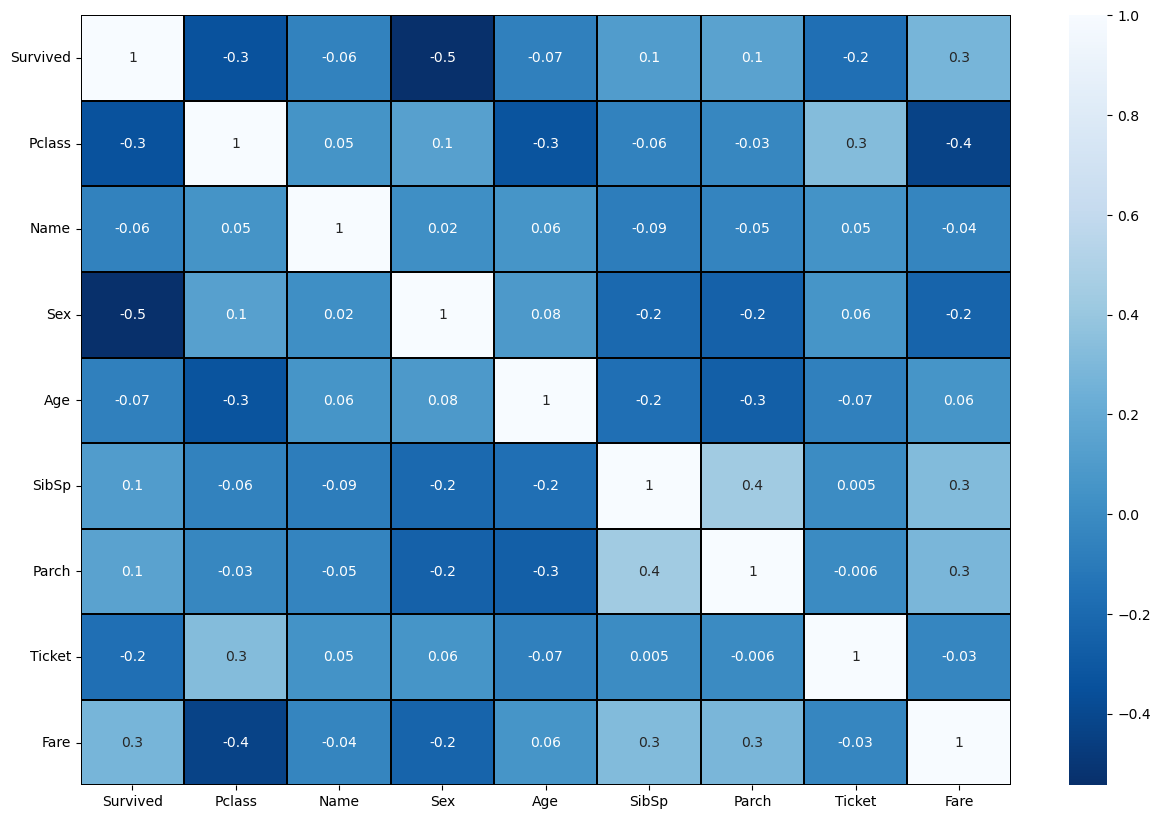

In [116]:
# Visualizing the correlation matrix by plotting the heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),linewidths=0.1,fmt=".1g",linecolor="black",annot=True,cmap="Blues_r")
plt.yticks(rotation=0);
plt.show()

In [118]:
cor['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.271859
Parch       0.146075
SibSp       0.102835
Name       -0.057343
Age        -0.069809
Ticket     -0.164549
Pclass     -0.338481
Sex        -0.543351
Name: Survived, dtype: float64

We observe positive and negative correlated features with the target

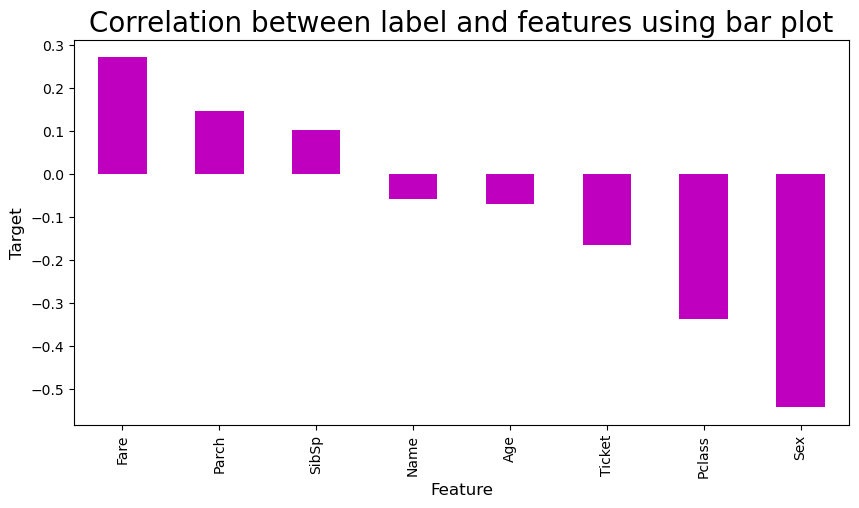

In [122]:
# Visualizing the correlation between label and features using bar plot
plt.figure(figsize=(10,5))
df.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color='m')
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Target', fontsize=12)
plt.title("Correlation between label and features using bar plot", fontsize=20)
plt.show()

In [123]:
# Separating features and label
x=df.drop("Survived",axis=1)
y=df["Survived"]

In [125]:
# Feature scaling using standard scalarization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,0.827377,-1.310217,0.737695,-0.592481,1.387437,-0.560401,0.918966,-0.532979
1,-1.566107,-0.991410,-1.355574,0.638789,1.387437,-0.560401,1.282625,1.004252
2,0.827377,-0.357685,-1.355574,-0.284663,-0.680195,-0.560401,1.646283,-0.480128
3,-1.566107,-0.672604,-1.355574,0.407926,1.387437,-0.560401,-1.442322,0.783611
4,0.827377,-1.671790,0.737695,0.407926,-0.680195,-0.560401,0.664904,-0.470783
...,...,...,...,...,...,...,...,...
886,-0.369365,0.400452,0.737695,-0.207709,-0.680195,-0.560401,-1.183277,-0.176567
887,-1.566107,-0.552079,-1.355574,-0.823344,-0.680195,-0.560401,-1.616678,0.375842
888,0.827377,-0.124412,-1.355574,0.000000,1.387437,1.812744,1.676173,0.207757
889,-1.566107,-1.415189,0.737695,-0.284663,-0.680195,-0.560401,-1.646568,0.375842


In [126]:
# Checking Variance Inflation Factor in each scaled column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.580348,Pclass
1,1.015427,Name
2,1.113983,Sex
3,1.244368,Age
4,1.323042,SibSp
5,1.383915,Parch
6,1.137134,Ticket
7,1.465744,Fare


In [127]:
y.value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

Here the data is not balanced. Since it is a classification problem, we will balance the data using over sampling method

In [128]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

In [129]:
y.value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [130]:
y1.value_counts()

0.0    549
1.0    549
Name: Survived, dtype: int64

In [133]:
# Finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxaccu=0
maxrs=0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=1)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
print("Best Accuracy is",maxaccu,"at random_state",maxrs)

Best Accuracy is 0.88 at random_state 93


The best accuracy is 88% at random_state 93

In [135]:
# Classification Algorithms
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [137]:
# Checking accuracy for Random Forest Classifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.8472727272727273
[[111  17]
 [ 25 122]]
              precision    recall  f1-score   support

         0.0       0.82      0.87      0.84       128
         1.0       0.88      0.83      0.85       147

    accuracy                           0.85       275
   macro avg       0.85      0.85      0.85       275
weighted avg       0.85      0.85      0.85       275



In [138]:
# Checking accuracy for Logistic Regression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.7745454545454545
[[100  28]
 [ 34 113]]
              precision    recall  f1-score   support

         0.0       0.75      0.78      0.76       128
         1.0       0.80      0.77      0.78       147

    accuracy                           0.77       275
   macro avg       0.77      0.77      0.77       275
weighted avg       0.78      0.77      0.77       275



In [148]:
# Checking accuracy for Gradient Boosting Classifier
GB=LogisticRegression()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.7745454545454545
[[100  28]
 [ 34 113]]
              precision    recall  f1-score   support

         0.0       0.75      0.78      0.76       128
         1.0       0.80      0.77      0.78       147

    accuracy                           0.77       275
   macro avg       0.77      0.77      0.77       275
weighted avg       0.78      0.77      0.77       275



In [139]:
# Checking accuracy for Support Vector Machine Classifier
SVC=SVC()
SVC.fit(x_train,y_train)
predSVC=SVC.predict(x_test)
print(accuracy_score(y_test,predSVC))
print(confusion_matrix(y_test,predSVC))
print(classification_report(y_test,predSVC))

0.8109090909090909
[[104  24]
 [ 28 119]]
              precision    recall  f1-score   support

         0.0       0.79      0.81      0.80       128
         1.0       0.83      0.81      0.82       147

    accuracy                           0.81       275
   macro avg       0.81      0.81      0.81       275
weighted avg       0.81      0.81      0.81       275



In [141]:
# Checking accuracy for AdaBoost Classifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.8
[[106  22]
 [ 33 114]]
              precision    recall  f1-score   support

         0.0       0.76      0.83      0.79       128
         1.0       0.84      0.78      0.81       147

    accuracy                           0.80       275
   macro avg       0.80      0.80      0.80       275
weighted avg       0.80      0.80      0.80       275



In [142]:
# Checking accuracy for Bagging Classifier
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.8545454545454545
[[114  14]
 [ 26 121]]
              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85       128
         1.0       0.90      0.82      0.86       147

    accuracy                           0.85       275
   macro avg       0.86      0.86      0.85       275
weighted avg       0.86      0.85      0.85       275



In [143]:
# Checking accuracy for ExtraTrees Classifier
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
predETC=ETC.predict(x_test)
print(accuracy_score(y_test,predETC))
print(confusion_matrix(y_test,predETC))
print(classification_report(y_test,predETC))

0.8436363636363636
[[105  23]
 [ 20 127]]
              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83       128
         1.0       0.85      0.86      0.86       147

    accuracy                           0.84       275
   macro avg       0.84      0.84      0.84       275
weighted avg       0.84      0.84      0.84       275



In [144]:
from sklearn.model_selection import cross_val_score

In [145]:
# Checking cv score for a Random Forest Classifier
score=cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print("Differrence between accuracy score and cross validation score is", accuracy_score(y_test,predRFC)-score.mean())

[0.78181818 0.85       0.83181818 0.9086758  0.90410959]
0.8552843503528436
Differrence between accuracy score and cross validation score is -0.00801162308011627


In [146]:
# Checking cv score for a Logistic Regression
score=cross_val_score(LR,x1,y1)
print(score)
print(score.mean())
print("Differrence between accuracy score and cross validation score is", accuracy_score(y_test,predLR)-score.mean())

[0.78181818 0.79545455 0.73181818 0.8173516  0.82648402]
0.790585305105853
Differrence between accuracy score and cross validation score is -0.016039850560398472


In [149]:
# Checking cv score for a Gradient Boosting Classifier
score=cross_val_score(GB,x1,y1)
print(score)
print(score.mean())
print("Differrence between accuracy score and cross validation score is", accuracy_score(y_test,predGB)-score.mean())

[0.78181818 0.79545455 0.73181818 0.8173516  0.82648402]
0.790585305105853
Differrence between accuracy score and cross validation score is -0.016039850560398472


In [150]:
# Checking cv score for a SVM Classifier
score=cross_val_score(SVC,x1,y1)
print(score)
print(score.mean())
print("Differrence between accuracy score and cross validation score is", accuracy_score(y_test,predSVC)-score.mean())

[0.78636364 0.81363636 0.78636364 0.84474886 0.82648402]
0.8115193026151932
Differrence between accuracy score and cross validation score is -0.0006102117061023149


In [151]:
# Checking cv score for a AdaBoost Classifier
score=cross_val_score(ABC,x1,y1)
print(score)
print(score.mean())
print("Differrence between accuracy score and cross validation score is", accuracy_score(y_test,predABC)-score.mean())

[0.75454545 0.81363636 0.8        0.84018265 0.85388128]
0.8124491490244914
Differrence between accuracy score and cross validation score is -0.012449149024491346


In [152]:
# Checking cv score for a Bagging Classifier
score=cross_val_score(BC,x1,y1)
print(score)
print(score.mean())
print("Differrence between accuracy score and cross validation score is", accuracy_score(y_test,predBC)-score.mean())

[0.77272727 0.84090909 0.82727273 0.91324201 0.85844749]
0.8425197177251972
Differrence between accuracy score and cross validation score is 0.012025736820257316


In [153]:
# Checking cv score for a ExtrTrees Classifier
score=cross_val_score(ETC,x1,y1)
print(score)
print(score.mean())
print("Differrence between accuracy score and cross validation score is", accuracy_score(y_test,predETC)-score.mean())

[0.76818182 0.84090909 0.83636364 0.89954338 0.92694064]
0.854387712743877
Differrence between accuracy score and cross validation score is -0.010751349107513408


Support Vector Machine Classifier is our best model as the difference between accuracy score and cross validation score is least